In [76]:
import bs4
import requests,re
import pandas as pd
import re
from wordcloud import WordCloud
import spacy
from matplotlib import pyplot as plt

inp=input()
inp+=' script fandom'
r1=requests.get("https://google.com/search?q="+inp)
soup=bs4.BeautifulSoup(r1.text,'html.parser')
links=soup.findAll('a')

r=requests.get("https://google.com"+links[16].get('href'))

s=bs4.BeautifulSoup(r.text,'html.parser')

a=s.findAll('p')
f=''
for i in a:
    f+=i.text
m=re.sub(r'\[.*?\]','',f)
#print(m)           

l=m.split('\n')
#print (l)
d1={}
for i in l:
    if i=='' or i==' ' or ':' not in i:
        continue
    a,b=i.split(':',1)
    
    
    if a not in d1:
        d1[a]=b
    else:
        d1[a]=d1[a]+','+b 
data=pd.DataFrame(d1,index=[0])
data1=data.T
data1=data1.reset_index()
data1.columns=['characters','dialogues']
#data1.to_excel('data4.xlsx')


 avengers end game


In [77]:
data1

,characters,dialogues
0,CLINT,"Okay, hold on. Don't shoot. You see where you..."
1,LILA,"Mhm. , Yeah., Mhm. , Who wants mayo on a hotdog?"
2,COOPER,"Nice., You go."
3,LAURA,"Nice throw, kiddo., Hey, you guys want mayo o..."
4,NATHANIEL,How about ketchup?
5,NEBULA,"Wrra! , I would like to try again. , It was f..."
6,TONY,You don't need to do that. Because uh... you'...
7,STEVE,"Neither could I., Change of plans., Tony, wha..."
8,TONY STARK,"I lost the kid., Is ummm... , It's okay. , Wh..."
9,STEVE ROGERS,"Tony, we lost."


In [84]:
nlp = spacy.load('en_core_web_sm')
def wc(name):
    x=data1
    
    a=x[x['characters']==name]
    a=(a['dialogues'].values)
    
    a=str(a[0])
                   
         
    a=a.split()
    a=a[1:]
    s=''
    for i in a:
        s=s+i+' '
    a=nlp(s)
    l=''
    for i in a:
        if i.is_stop!=True and i.is_punct!=True:
            l=(l+str(i).lower())+' '
    wordcloud= WordCloud(width = 800, height = 800, 
                background_color ='white', 
                 
                min_font_size = 10).generate(l)                       
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()   
    

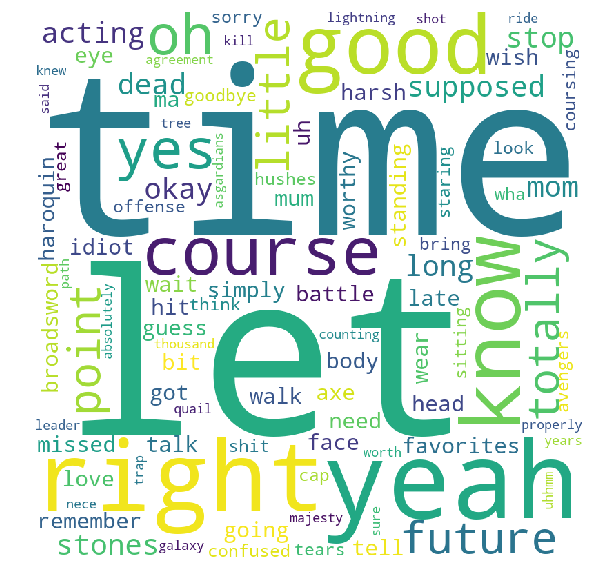

In [86]:
wc('THOR')